# Análsis de MDE y curva de nivel

In [1]:
import os, glob, rasterio, subprocess
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

In [2]:
# Directorio de trabajo Landsat
os.chdir(r"D:\Descarga")
os.getcwd()

'D:\\Descarga'

In [3]:
Lista = glob.glob("*.tif")
Lista

['MDE_SRTM1.tif']

In [5]:
MDE = rasterio.open(Lista[0])

In [6]:
MDE.res

(30.0, 30.0)

In [7]:
MDE_R = MDE.read(1)

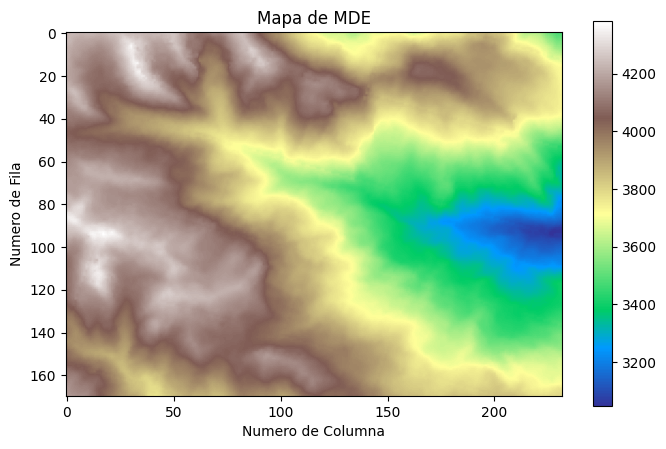

In [9]:
# Ploteamos el resultado
plt.figure(figsize = (8,5))
plt.imshow(MDE_R, cmap='terrain') # jet, Spectral, Viridis, RdYlGn,terrain
plt.colorbar()
plt.title("Mapa de MDE")
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.savefig('Grafico_MDE.png')
plt.show()

In [10]:
## Caracteristicas del MDE

In [10]:
print("Valor minimo MDE:", MDE_R.min())
print("Valor maximo MDE:", MDE_R.max())
print("Valor promedio MDE:", round(MDE_R.mean(),3))
print("Valor desviasion estandar MDE:", round(MDE_R.std(),3))
print("Valor varianza MDE:", round(MDE_R.var(),3))
print("Dimensiones MDE:", MDE_R.shape)
print("Tipo dato MDE:", MDE_R.dtype)
print("Total de pixcel MDE:", MDE_R.size)

Valor minimo MDE: 3046
Valor maximo MDE: 4381
Valor promedio MDE: 3841.508
Valor desviasion estandar MDE: 281.242
Valor varianza MDE: 79097.063
Dimensiones MDE: (170, 232)
Tipo dato MDE: int16
Total de pixcel MDE: 39440


In [21]:
salida = 'curvas_de_nivel_30m.shp'

In [22]:
# Intervalo de las curvas de nivel
intervalo = 30  # Intervalo entre las curvas de nivel

In [23]:
# Ejecutar gdal_contour para generar las curvas de nivel
comando = ['gdal_contour', '-a', 'elevacion', '-i', str(intervalo), Lista[0], salida]
subprocess.call(comando)

0

In [24]:
contour_levels = np.arange(0, np.max(MDE_R), 30) 

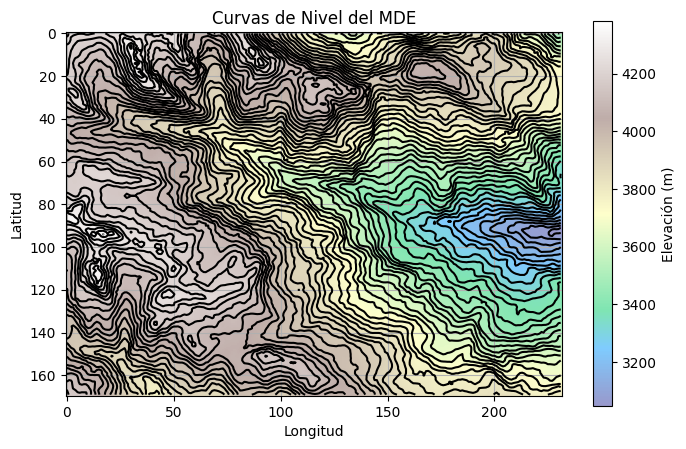

In [26]:
# Paso 4: Visualizar las curvas de nivel
plt.figure(figsize=(8, 5))
plt.contour(MDE_R, levels=contour_levels, colors='black')
plt.imshow(MDE_R, cmap='terrain', alpha=0.5)
plt.colorbar(label='Elevación (m)')
plt.title('Curvas de Nivel del MDE')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.savefig('Grafico_MDE_curva.png')
plt.show()

### Clasificación MDE

In [71]:
(MDE_R.max()-MDE_R.min())/7

190.71428571428572

In [72]:
Clasifi = list(range(MDE_R.min(), MDE_R.max(), 190))

In [73]:
Clasifi

[3046, 3236, 3426, 3616, 3806, 3996, 4186, 4376]

In [74]:
MDE_Class = np.digitize(MDE_R, Clasifi)
MDE_Class

array([[7, 7, 7, ..., 3, 3, 3],
       [7, 7, 7, ..., 3, 3, 3],
       [7, 7, 7, ..., 3, 3, 3],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4]], dtype=int64)

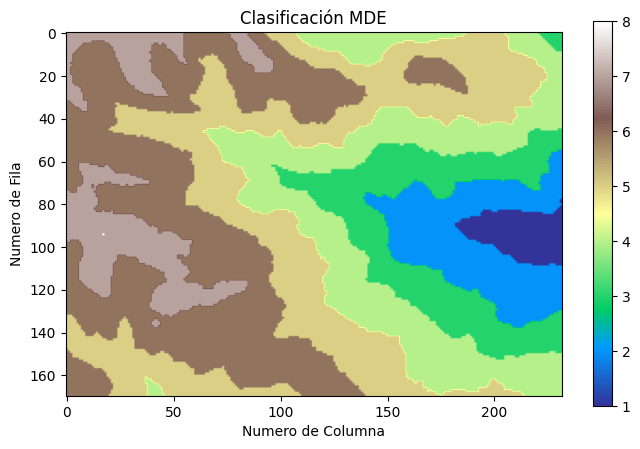

In [75]:
# Ploteamos el resultado
plt.figure(figsize = (8,5))
plt.imshow(MDE_Class, cmap='terrain') # jet, Spectral, Viridis, RdYlGn, terrain
plt.colorbar()
plt.title("Clasificación MDE")
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.savefig('Grafico_MDE_clas.png')
plt.show()

In [32]:
# Guardar tipo de dato int - entero
MDE_Class = MDE_Class.astype(int)
MDE_Class

array([[2, 2, 2, ..., 1, 1, 2],
       [2, 2, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 2, ..., 2, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 2, 3, 3]])

In [33]:
MDE_Class.dtype

dtype('int32')

In [34]:
param = MDE.meta
param

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 337,
 'height': 201,
 'count': 1,
 'crs': CRS.from_epsg(32718),
 'transform': Affine(30.0, 0.0, 520710.0,
        0.0, -30.0, 9034020.0)}

In [35]:
param_clas = MDE.meta
param_clas.update(count = 1,
                  nodata = None,
                  dtype= 'int32')
param_clas

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': None,
 'width': 337,
 'height': 201,
 'count': 1,
 'crs': CRS.from_epsg(32718),
 'transform': Affine(30.0, 0.0, 520710.0,
        0.0, -30.0, 9034020.0)}

In [36]:
os.getcwd()

'D:\\Descarga'

In [37]:
# Exportamos una banda MDE Clasificado
with rasterio.open("MDE_Clas.tif", 'w', **param_clas) as DATOS:
    DATOS.write_band(1, MDE_Class)